<a href="https://colab.research.google.com/github/alicepearse/DL_prac/blob/master/Simple_RNN_practise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.layers import Input, SimpleRNN, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

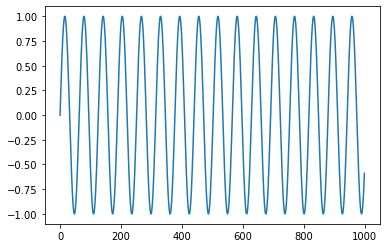

In [2]:
# make the original data
series = np.sin(0.1*np.arange(1000)) #+ np.random.randn(200)*0.1

# plot it
plt.plot(series)
plt.show()

In [3]:
# build the dataset
T = 10
D = 1
X = []
Y = []
for t in range(len(series) - T):
  x = series[t:t+T]
  X.append(x)
  y = series[t+T]
  Y.append(y)

X = np.array(X).reshape(-1, T, 1) # the data should be N x T x D
Y = np.array(Y)
N = len(X)
print("X.shape", X.shape, "Y.shape", Y.shape)

X.shape (990, 10, 1) Y.shape (990,)


In [13]:
# build the model
i = Input(shape=(T,1))
x = SimpleRNN(15, activation='relu')(i)
x = Dense(1)(x)
model = Model(i, x)

model.compile(loss='mse',
              optimizer=Adam(lr=0.001))

In [14]:
# train the model
r = model.fit(
    X[:-N//2], Y[:-N//2],
    epochs=80,
    validation_data=(X[-N//2:], Y[-N//2:])
)

Epoch 1/80
16/16 [==============================] - 0s 13ms/step - loss: 0.3646 - val_loss: 0.2901
Epoch 2/80
16/16 [==============================] - 0s 4ms/step - loss: 0.2306 - val_loss: 0.1707
Epoch 3/80
16/16 [==============================] - 0s 3ms/step - loss: 0.1306 - val_loss: 0.0902
Epoch 4/80
16/16 [==============================] - 0s 4ms/step - loss: 0.0644 - val_loss: 0.0420
Epoch 5/80
16/16 [==============================] - 0s 4ms/step - loss: 0.0303 - val_loss: 0.0211
Epoch 6/80
16/16 [==============================] - 0s 4ms/step - loss: 0.0177 - val_loss: 0.0143
Epoch 7/80
16/16 [==============================] - 0s 4ms/step - loss: 0.0135 - val_loss: 0.0116
Epoch 8/80
16/16 [==============================] - 0s 4ms/step - loss: 0.0110 - val_loss: 0.0095
Epoch 9/80
16/16 [==============================] - 0s 4ms/step - loss: 0.0090 - val_loss: 0.0076
Epoch 10/80
16/16 [==============================] - 0s 4ms/step - loss: 0.0071 - val_loss: 0.0061
Epoch 11/80
16/16 

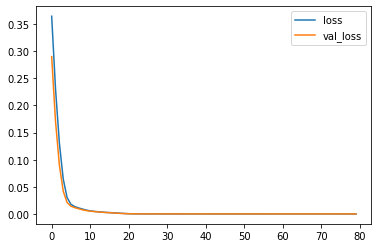

In [15]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

In [16]:
validation_target = Y[-N//2:]
validation_predictions = []

# first validation input
last_x = X[-N//2] # 1-D array of length T

while len(validation_predictions) < len(validation_target):
  p = model.predict(last_x.reshape(1, -1, 1))[0,0] # 1x1 array -> scalar
  
  # update the predictions list
  validation_predictions.append(p)
  
  # make the new input
  last_x = np.roll(last_x, -1)
  last_x[-1] = p


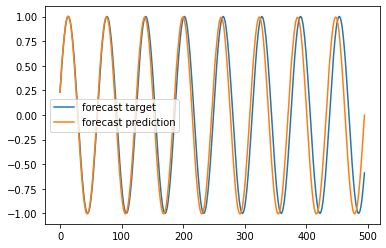

In [17]:
plt.plot(validation_target, label='forecast target')
plt.plot(validation_predictions, label='forecast prediction')
plt.legend()